# Project 3: Web APIs & NLP - 05

Kelly Slatery | US-DSI-10 | 01.31.2020

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix

In [2]:
# Set viewing options
pd.set_option('display.max_columns', 10000)

# Import data

In [3]:
submissions = pd.read_csv('./data/submissions.csv')

In [4]:
comments = pd.read_csv('./data/comments.csv')

# Model evaluation

In [5]:
# Define X and y
X = submissions['all_text']
y = submissions['subreddit']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.33, 
                                                    random_state=42)

In [6]:
# Define baseline accuracy
y.value_counts(normalize=True)

1    0.505982
0    0.494018
Name: subreddit, dtype: float64

We have a baseline accuracy of ~50.6% because our majority class ('subreddit' == 1 AKA 'beatles') comprises ~50.6% of the data. Thus, if we predicted that all posts came from the Beatles subreddit, we would be accurate ~50.6% of the time.

# Model Evaluation

Logistic regression with a TFIDFVectorizer received the 4th highest accuracy rating overall of models run, with an accuracy score of ~85.53% on train data. It is by far the most interpretable high-scoring model.

The highest scoring model was Random Forest with a CountVectorizer at ~85.83% accuracy, with Support Vector Machine model next at ~85.8% accuracy, followed by another Random Forest with a TFIDFVectorizer with accuracy ~85.67%. All other models yielded an accuracy score on trian data between ~77.63% (KNN with TFIDFVectorizer) and ~85.48% (Logistic Regression with CountVectorizer).

As we can see, all three models received fairly similar scores on training data. We got the best parameters for each model that yielded these scores and will instantitate and test on test data below to get a more comprehensive view of the models' effectiveness in predicting subreddit classification of posts.

# Logistic Regression - TFIDFVectorizer

In [7]:
# Transform X_train with TFIDFVectorizer
tvec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=500)
Z_train = tvec.fit_transform(X_train)

# Instantiate and fit model
lr = LogisticRegression(solver='lbfgs', max_iter=5000)
lr.fit(Z_train, y_train)

# Score model on train data
lr.score(Z_train, y_train)

0.8696984601415005

In [8]:
# Train data cross val score
cross_val_score(lr, Z_train, y_train, cv=5).mean()

0.8565322950798258

In [9]:
# Transform X_test with TFIDFVectorizer
Z_test = tvec.transform(X_test)

# Test data score
lr.score(Z_test, y_test)

0.8542898840156694

This Logistic Regression model is somewhat overfit, but not terribly. Compare to Random Forest below.

# Random Forest - CountVectorizer

In [10]:
# Transform X_train with TFIDFVectorizer
cvec = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=500)
Z_train = cvec.fit_transform(X_train)

# Instantiate and fit model
rf = RandomForestClassifier(n_estimators=200, 
                            max_depth=None, 
                            max_features='log2', 
                            min_samples_split=50)
rf.fit(Z_train, y_train)

# Score model on train data
rf.score(Z_train, y_train)

0.9023116794672922

In [11]:
# Cross val score on train data
cross_val_score(rf, Z_train, y_train, cv=5).mean()

0.8579321407232428

In [12]:
# Transform X_test with TFIDFVectorizer
Z_test = cvec.transform(X_test)

# Test data score
rf.score(Z_test, y_test)

0.8549043705353714

This Random Forest Classifier is quite overfit and actually performs worse on test data than Logistic Regression. For this reason and for interpretability, use Logistic Regression for prediction, visualizations, and presentation.

# Explore and visualize Logistic Regression model

In [13]:
# Create dataframe with all corpus words and text frequency inverse document frequency score
Z_train_df = pd.DataFrame(data=Z_train.toarray(),
                          columns=tvec.get_feature_names())

In [14]:
# Look at first 5 rows of dataframe
Z_train_df.head()

,10,11,12,13,14,15,16,17,18,189,1964,1966,1968,1969,1977,1979,1986,20,2018,2019,30,39,50,abbey,abbey road,able,actually,adam,adam lambert,ago,aid,album,albums,alive,amazing,animation,anniversary,anthology,anybody,art,ask,attack,audience,audio,away,baby,bad,band,bands,bass,beatle,beatles,beatles album,beatles song,beatles songs,beautiful,believe,best,better,big,birthday,bit,black,bohemian,bohemian rhapsody,book,bought,box,boy,boys,break,brian,buy,called,came,car,cd,champions,change,christmas,close,club,collection,come,comes,coming,comments,concert,cool,course,cover,covers,crazy,curious,cutie,day,day life,day night,days,deacon,dead,dear,death,decided,definitely,did,didn,different,does,does know,doesn,doing,don,don know,don stop,drawing,dust,early,edition,end,enjoy,equestria,equestria girls,especially,fact,fan,fans,far,favorite,favorite song,feel,feel like,fields,film,final,finally,forever,freddie,freddie mercury,free,friend,friends,fun,game,george,george harrison,gets,getting,girl,girls,girls princess,god,goes,going,good,google,got,great,greatest,greatest hits,group,gt,guess,guitar,guy,guys,happy,hard,hard day,harrison,haven,having,hear,heard,heart,heart attack,heaven,hello,help,hey,hi,high,history,hit,hits,home,hope,hot,hot space,http,http strawpoll,idea,ii,im,imagine,innuendo,interesting,interview,isn,jazz,john,john lennon,jpg,just,killer,killer queen,kind,kind magic,knew,know,known,knows,la,lambert,late,later,leaving,left,lennon,let,life,like,link,list,listen,listened,listening,little,live,live aid,live stream,ll,london,lonely,long,look,looking,looks,lot,love,loved,lyrics,magic,magical,magical mystery,make,makes,making,man,march,mark,marks,martin,maybe,mccartney,mcgregor,mean,members,mendes,mendes vs,mercury,mind,miracle,mix,mono,mother,movie,mr,music,mystery,mystery tour,need,new,news,news world,nice,night,night opera,noticed,number,official,oh,old,online,open,opera,opinion,order,original,pass,past,paul,paul mccartney,peace,people,pepper,perfect,performance,personally,photo,piano,picture,place,play,played,playing,playlist,point,popular,post,posted,poster,pressure,pretty,princess,probably,quality,queen,queen song,queen songs,question,quite,radio,rami,ranked,ranking,read,real,really,reason,recently,record,recorded,recording,redd,reddit,release,released,remember,remix,removed,rest,revolution,revolver,rhapsody,right,ringo,ringo starr,road,rock,roger,roger taylor,roll,round,round vote,rubber,rubber soul,run,said,sale,saw,say,saying,says,scene,school,second,seeing,seen,series,sessions,set,sgt,sgt pepper,share,sheer,sheer heart,shows,similar,sing,singing,single,solo,somebody,somebody love,son,song,song album,songs,sorry,soul,sound,sounds,space,sparkle,sparkle cutie,special,spotify,standing,starr,start,started,stereo,stop,story,strawberry,strawberry fields,strawpoll,stream,studio,stuff,sub,submarine,sun,super,sure,survivor,survivor round,takes,talk,taylor,tell,thank,thanks,thing,things,think,thinking,thought,thoughts,time,times,title,today,tonight,took,tour,track,tracks,tribute,tried,true,try,trying,twilight,twilight sparkle,ufc,ufc 189,uk,underrated,universe,use,used,ve,version,versions,video,videos,vinyl,vocal,vocals,voice,vote,vote favorite,voted,votes,vs,vs mcgregor,want,wanted,wants,wasn,watch,watching,way,week,went,white,white album,wings,won,wondering,work,works,world,worth,written,wrong,wrote,year,years,years ago,yellow,yellow submarine,yes,yesterday,yoko,youtu,youtube,youtube watch
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [15]:
# Look at 20 words that appear most often across some documents, but not all documents
# AKA likely best predictors of subreddit classification
Z_train_df.sum().sort_values(ascending=False).head(20)

queen       6019
beatles     5743
song        4191
album       3896
like        3612
just        3373
freddie     3346
songs       3057
love        2876
john        2863
paul        2672
know        2414
think       2152
live        2039
favorite    1832
don         1811
ve          1736
time        1705
good        1690
best        1601
dtype: int64

In [16]:
# Look at strength of each of top 10 of the 500 features in predicting either subreddit
# Negative correlations --> Queen ; Positive correlations --> Beatles
features_500 = sorted(list(zip(lr.coef_[0], tvec.get_feature_names())))
features_500[:10] + features_500[-10:]


[(-13.40781896143633, 'queen'),
 (-10.129365897510286, 'freddie'),
 (-5.29896428619457, 'brian'),
 (-4.899517655075445, 'deacon'),
 (-4.891175788019407, 'roger'),
 (-4.261160772056274, 'rhapsody'),
 (-3.9209174458091804, 'mercury'),
 (-3.76662502861648, 'bohemian'),
 (-3.633885334876999, 'don stop'),
 (-3.5335793107260316, 'champions'),
 (3.723340714798797, 'sgt'),
 (3.7407735919196132, 'yoko'),
 (4.0202326499860535, 'white album'),
 (4.399043393010917, 'beatle'),
 (4.545279101490012, 'mccartney'),
 (5.3836419979388825, 'george'),
 (5.484762183515516, 'lennon'),
 (5.839056201942643, 'ringo'),
 (7.630822952069868, 'paul'),
 (12.652372891814867, 'beatles')]

In [17]:
# Make a dataframe of top 20 strongest predictors for Queen
queen_feats_list = []

for x,y in features_500[:20]:
    feat = {}
    feat['feature'] = y
    feat['coefficient'] = x
    queen_feats_list.append(feat)

queen_feats_df = pd.DataFrame(queen_feats_list)
queen_feats_df.head()

,feature,coefficient
0,queen,-13.407819
1,freddie,-10.129366
2,brian,-5.298964
3,deacon,-4.899518
4,roger,-4.891176


In [18]:
queen_feats_df.shape

(20, 2)

In [19]:
# Make a dataframe of top 20 strongest predictors for Beatles
beatles_feats_list = []

for x,y in features_500[:-21:-1]:
    feat = {}
    feat['feature'] = y
    feat['coefficient'] = x
    beatles_feats_list.append(feat)

beatles_feats_df = pd.DataFrame(beatles_feats_list)
beatles_feats_df.head()

,feature,coefficient
0,beatles,12.652373
1,paul,7.630823
2,ringo,5.839056
3,lennon,5.484762
4,george,5.383642


In [20]:
beatles_feats_df.shape

(20, 2)

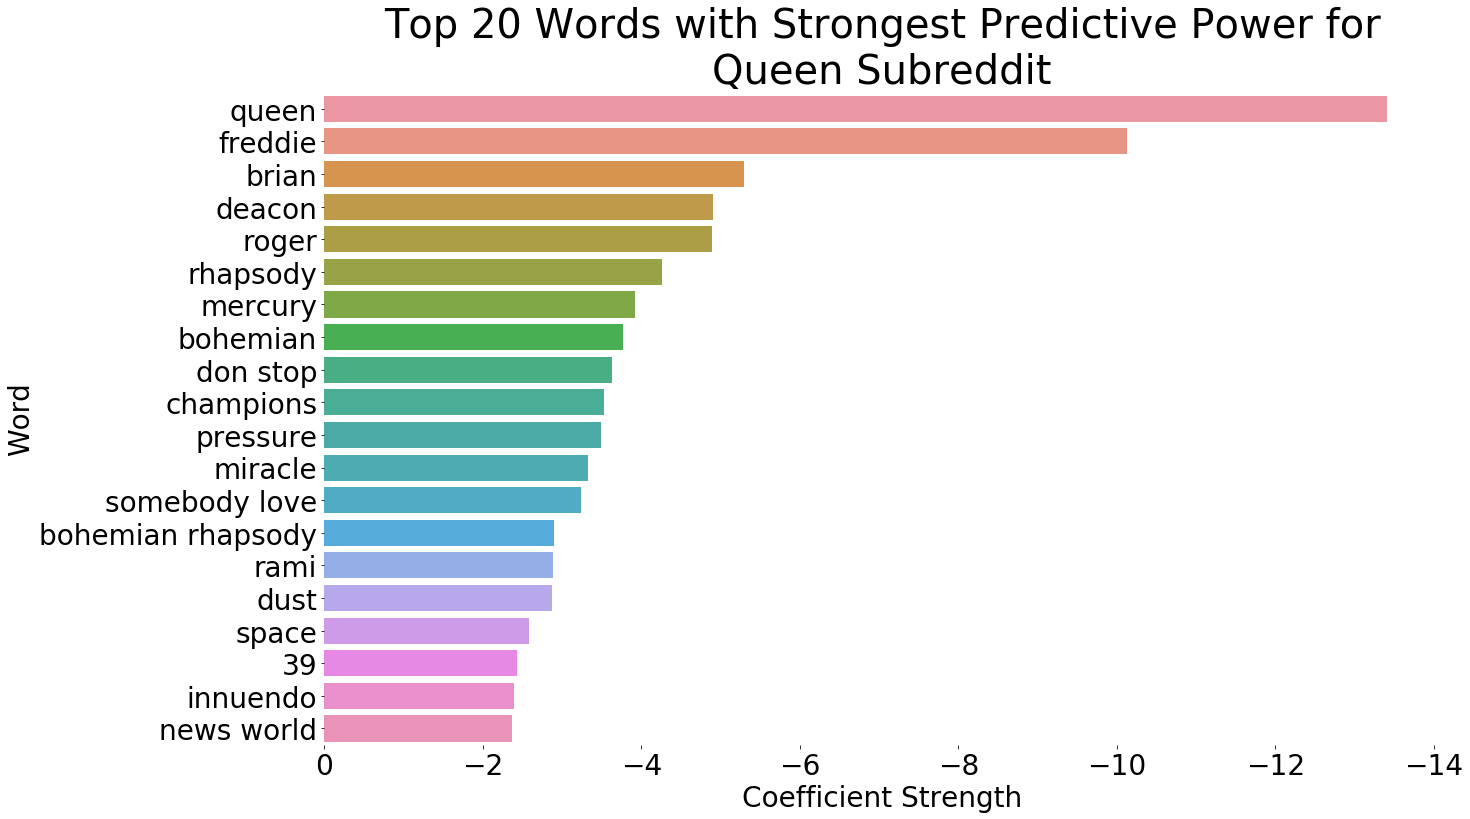

In [21]:
# Plot the top predictors for Queen
plt.figure(figsize=(20,12))
sns.barplot(data=queen_feats_df, x='coefficient', y='feature').invert_xaxis()
plt.xlabel('Coefficient Strength', size=28)
plt.ylabel('Word', size=28)
plt.yticks(size=28)
plt.xticks(size=28)
plt.title('Top 20 Words with Strongest Predictive Power for\nQueen Subreddit', size=40)
sns.despine(left=True, bottom=True);

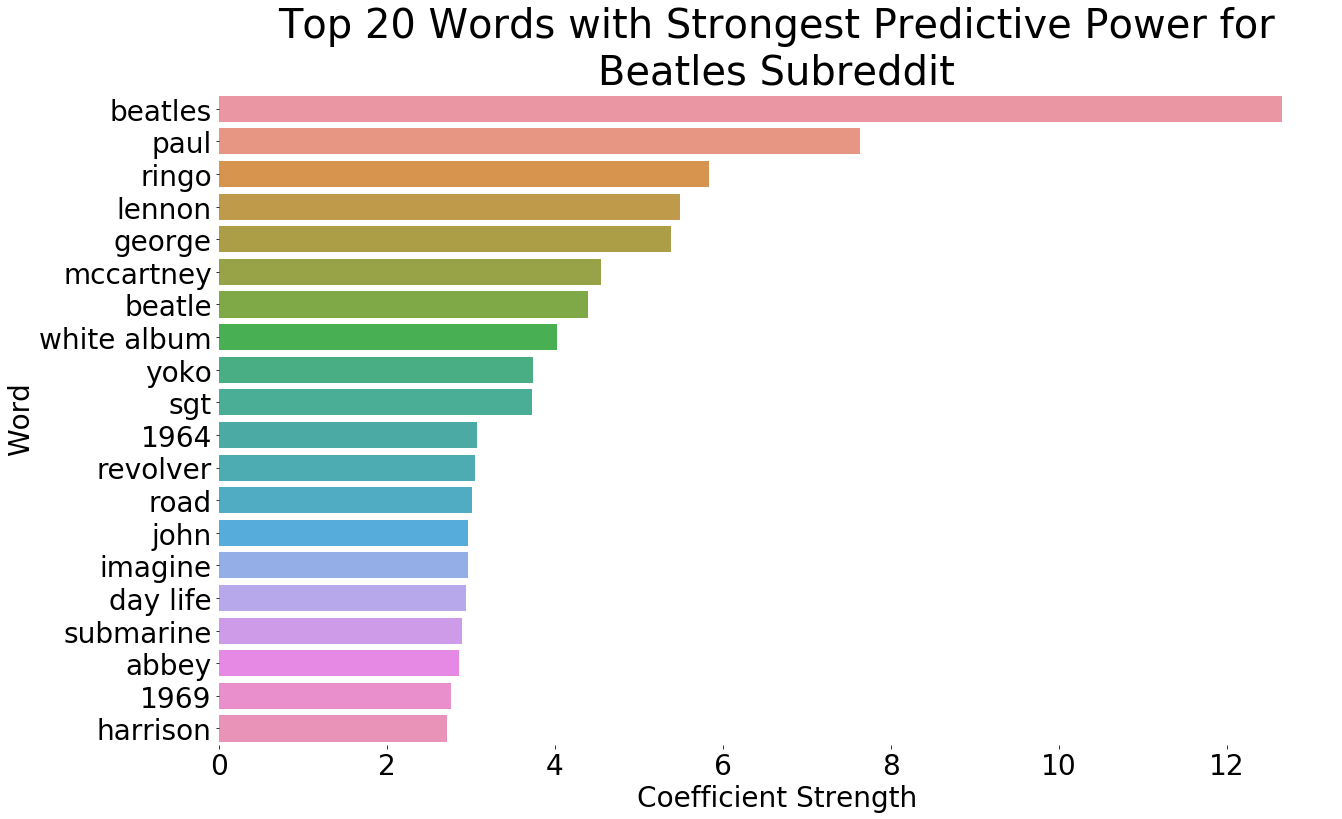

In [22]:
# Plot the top predictors for Beatles
plt.figure(figsize=(20,12))
sns.barplot(beatles_feats_df['coefficient'], beatles_feats_df['feature'])
plt.xlabel('Coefficient Strength', size=28)
plt.ylabel('Word', size=28)
plt.yticks(size=28)
plt.xticks(size=28)
plt.title('Top 20 Words with Strongest Predictive Power for\nBeatles Subreddit', size=40)
sns.despine(left=True, bottom=True);

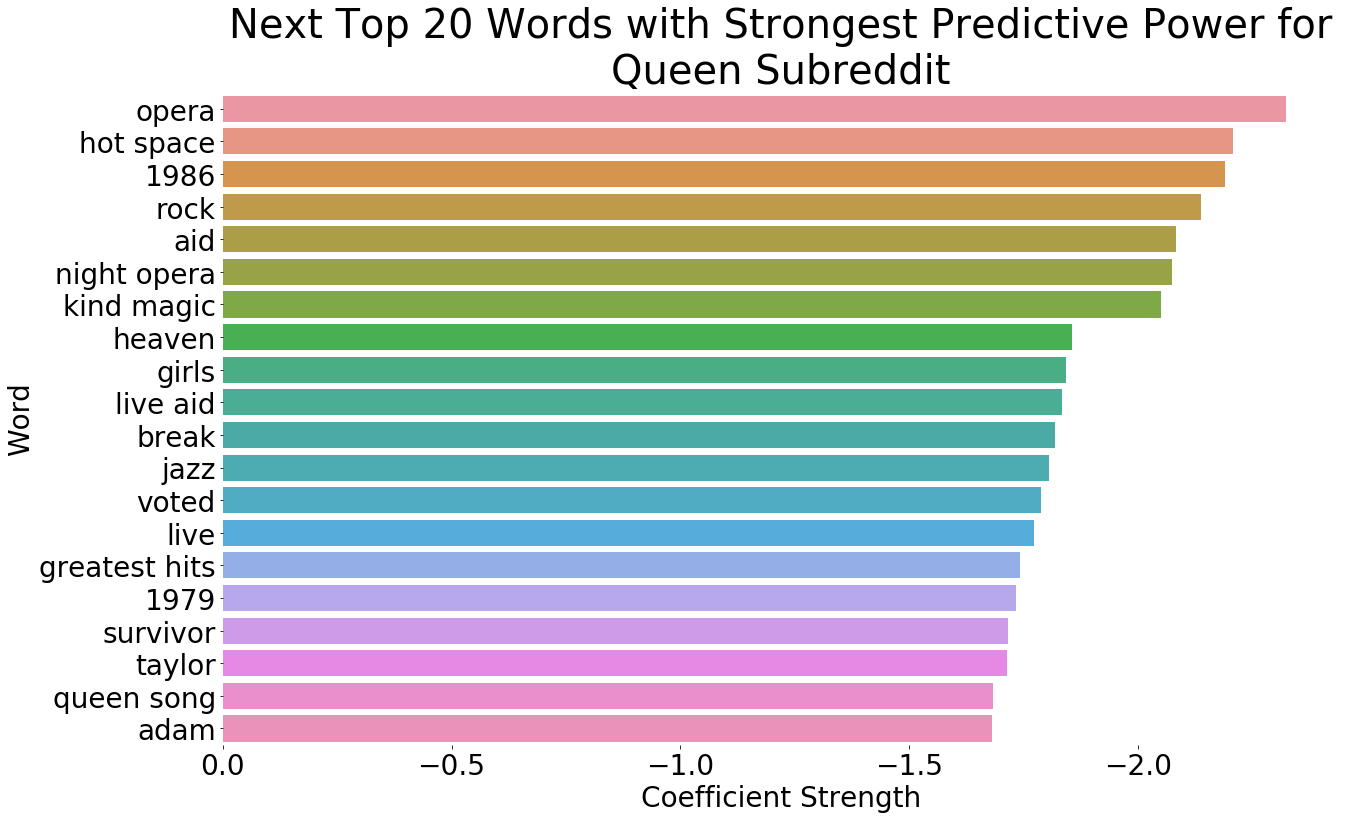

In [23]:
# Make a dataframe of next 20 (20th-40th) top strongest predictors for Queen
queen_feats_list = []

for x,y in features_500[20:40]:
    feat = {}
    feat['feature'] = y
    feat['coefficient'] = x
    queen_feats_list.append(feat)

queen_feats_df = pd.DataFrame(queen_feats_list)
queen_feats_df.head()

# Plot the next 20 (20th-40th) top predictors for Queen
plt.figure(figsize=(20,12))
sns.barplot(data=queen_feats_df, x='coefficient', y='feature').invert_xaxis()
plt.xlabel('Coefficient Strength', size=28)
plt.ylabel('Word', size=28)
plt.yticks(size=28)
plt.xticks(size=28)
plt.title('Next Top 20 Words with Strongest Predictive Power for\nQueen Subreddit', size=40)
sns.despine(left=True, bottom=True);

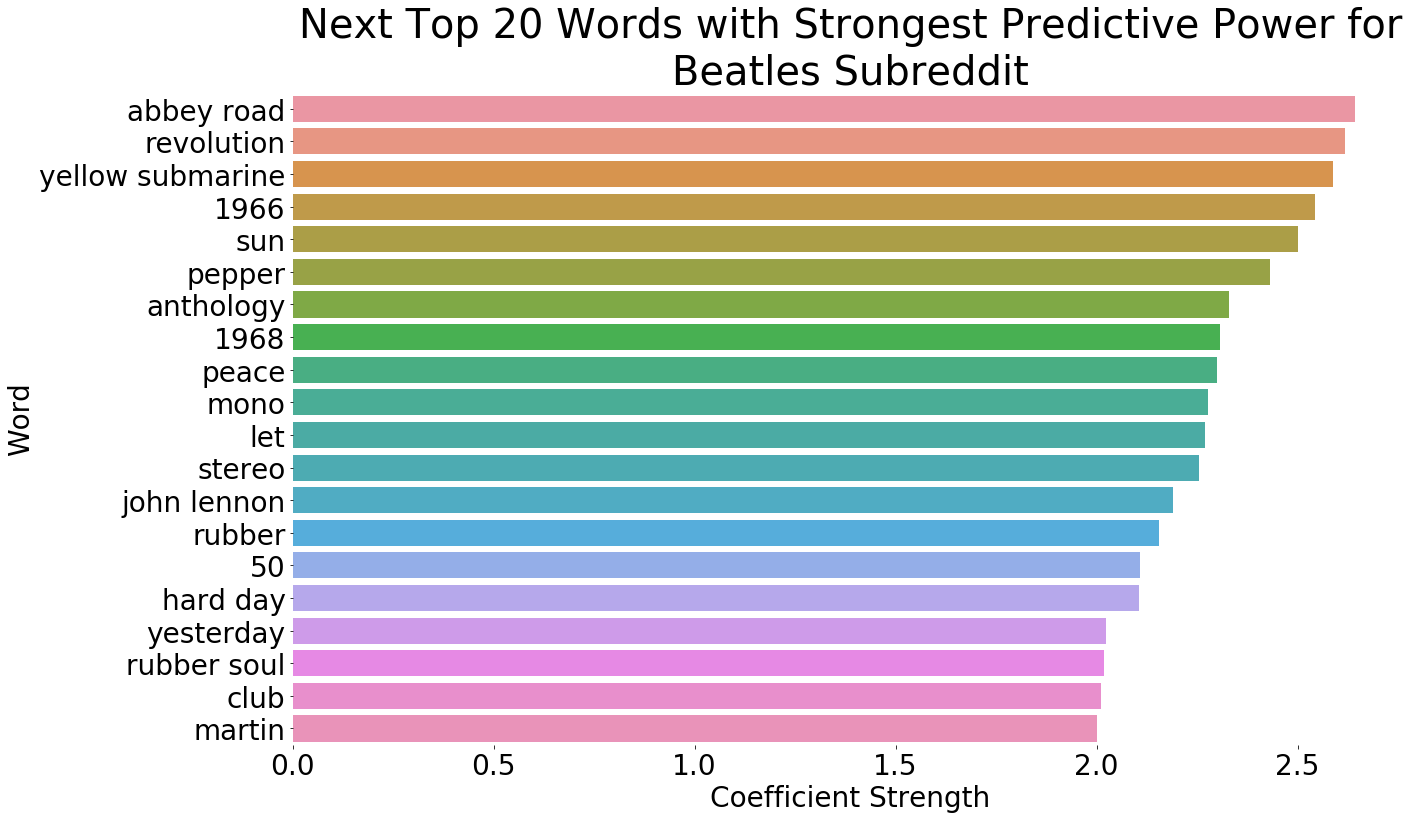

In [24]:
# Make a dataframe of next 20 (20th-40th) top strongest predictors for Beatles
beatles_feats_list = []

for x,y in features_500[-21:-41:-1]:
    feat = {}
    feat['feature'] = y
    feat['coefficient'] = x
    beatles_feats_list.append(feat)

beatles_feats_df = pd.DataFrame(beatles_feats_list)
beatles_feats_df.head()

# Plot the next top 20 (20th-40th) predictors for Beatles
plt.figure(figsize=(20,12))
sns.barplot(beatles_feats_df['coefficient'], beatles_feats_df['feature'])
plt.xlabel('Coefficient Strength', size=28)
plt.ylabel('Word', size=28)
plt.yticks(size=28)
plt.xticks(size=28)
plt.title('Next Top 20 Words with Strongest Predictive Power for\nBeatles Subreddit', size=40)
sns.despine(left=True, bottom=True);

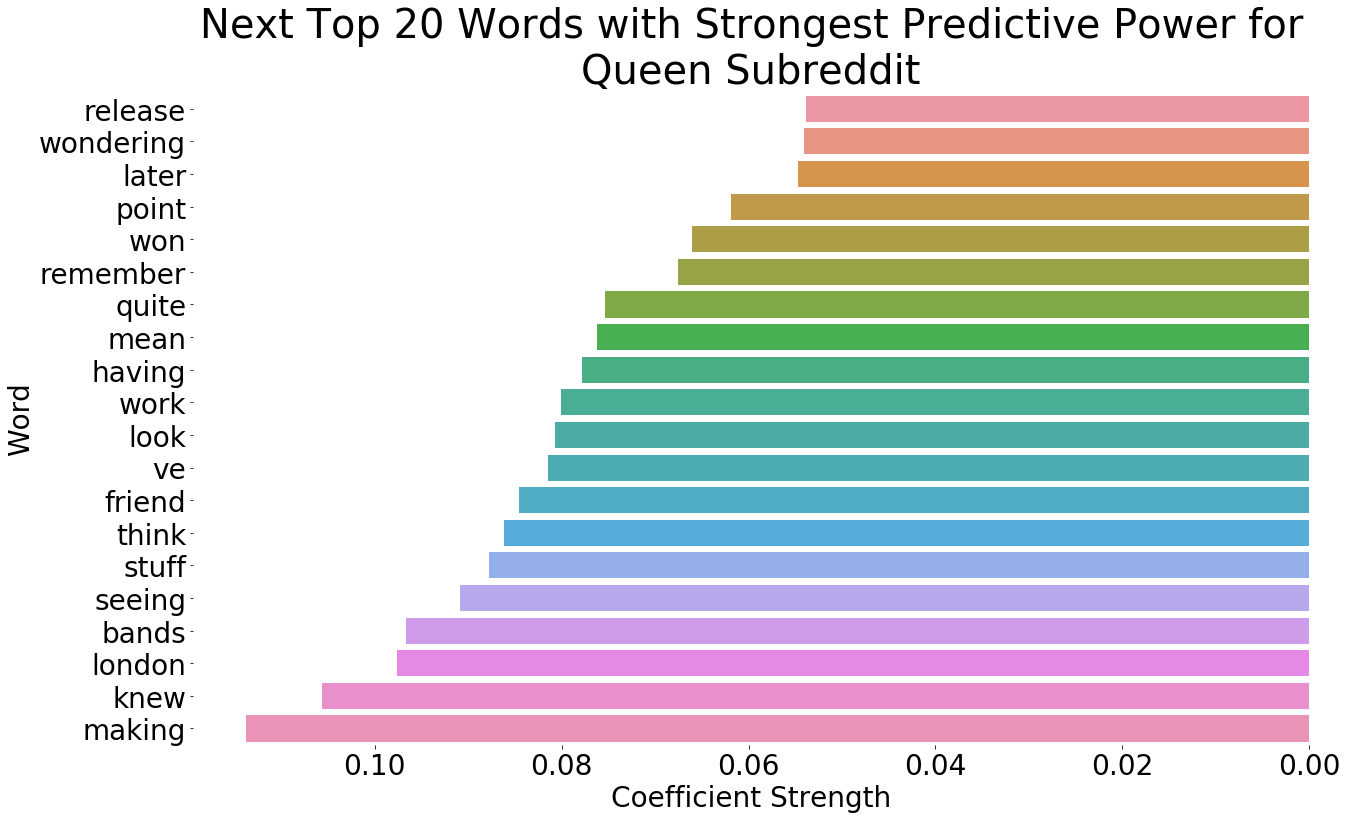

In [25]:
# Make a dataframe of middle predictors for both
queen_feats_list = []

for x,y in features_500[240:260]:
    feat = {}
    feat['feature'] = y
    feat['coefficient'] = x
    queen_feats_list.append(feat)

queen_feats_df = pd.DataFrame(queen_feats_list)
queen_feats_df.head()

# Plot the middle predictors for both
plt.figure(figsize=(20,12))
sns.barplot(data=queen_feats_df, x='coefficient', y='feature').invert_xaxis()
plt.xlabel('Coefficient Strength', size=28)
plt.ylabel('Word', size=28)
plt.yticks(size=28)
plt.xticks(size=28)
plt.title('Next Top 20 Words with Strongest Predictive Power for\nQueen Subreddit', size=40)
sns.despine(left=True, bottom=True);

Not very informative. Given time limitations, do a cursory look through the features and see which has positive feeling and which band they predict for.

In [26]:
features_500

[(-13.40781896143633, 'queen'),
 (-10.129365897510286, 'freddie'),
 (-5.29896428619457, 'brian'),
 (-4.899517655075445, 'deacon'),
 (-4.891175788019407, 'roger'),
 (-4.261160772056274, 'rhapsody'),
 (-3.9209174458091804, 'mercury'),
 (-3.76662502861648, 'bohemian'),
 (-3.633885334876999, 'don stop'),
 (-3.5335793107260316, 'champions'),
 (-3.486856857582854, 'pressure'),
 (-3.3324466040279903, 'miracle'),
 (-3.2382284192773203, 'somebody love'),
 (-2.8938377430799256, 'bohemian rhapsody'),
 (-2.889787660382716, 'rami'),
 (-2.873535258059125, 'dust'),
 (-2.5802186507999183, 'space'),
 (-2.42815179881236, '39'),
 (-2.396238575499776, 'innuendo'),
 (-2.366002430107794, 'news world'),
 (-2.323470164038477, 'opera'),
 (-2.2090170611173794, 'hot space'),
 (-2.1900634322213346, '1986'),
 (-2.1386807669122523, 'rock'),
 (-2.0836030869466056, 'aid'),
 (-2.075184587509655, 'night opera'),
 (-2.051264890079584, 'kind magic'),
 (-1.856312633658435, 'heaven'),
 (-1.8428566546915623, 'girls'),
 (-1.

In [27]:
# Get probability for 'subreddit' == 'queen'
probs = lr.predict_proba(Z_test)[:, 0]
probs[:10]

array([1.00000000e+00, 0.00000000e+00, 9.99999573e-01, 6.08535444e-12,
       1.00000000e+00, 5.55771700e-01, 9.65774163e-01, 5.55771700e-01,
       9.99998094e-01, 9.99960164e-01])

In [28]:
# Get predictions
preds = lr.predict(Z_test)
preds[:10]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [29]:
# Zip probs / preds / actuals
probs_preds_actual = list(zip(probs, preds, y_test))
probs_preds_actual[:10]

[(0.9999999999817423, 0, 0),
 (0.0, 1, 1),
 (0.9999995728790328, 0, 0),
 (6.085354442575408e-12, 1, 1),
 (1.0, 0, 0),
 (0.5557716995262906, 0, 0),
 (0.9657741627247656, 0, 0),
 (0.5557716995262906, 0, 0),
 (0.9999980935781064, 0, 0),
 (0.9999601644956256, 0, 0)]

In [30]:
# Generate confusion matrix
cm = confusion_matrix(y_test, preds)

In [31]:
# Create labeled dataframe from confusion matrix
# Code adapted from lesson 4.03-lesson-classification_metrics_i by Matt Brems & Riley Dallas
cm_df = pd.DataFrame(cm, 
             columns=['Predicted Queen', 'Predicted Beatles'], 
             index=['Actual Queen', 'Actual Beatles'])
cm_df

,Predicted Queen,Predicted Beatles
Actual Queen,5657,794
Actual Beatles,1116,5452


In [32]:
# Calculate sensitivity (TP / All P)
5372 / (5372 + 1196)

0.817904993909866

In [33]:
# Calculate specificity (TN / All N)
5750 / (5750 + 701)

0.8913346767942955

In [34]:
# Calculate precision (TP / (TP + FN))
5372 / (5372 + 701)

0.8845710521982546

In [35]:
# Calculate accuracy (TP + TN) / n
(5372 + 5750) / (5372 + 5750 + 1196 + 701)

0.8542898840156694

In [36]:
# Calculate misclassification rate (FP + FN) / n
(1196 + 701) / (5372 + 5750 + 1196 + 701)

0.1457101159843306

In [38]:
# Baseline accuracy for comparison
y_test.value_counts(normalize=True)[1]

0.5044934326753207

# Conclusions and Recommendations

In the end, there was an inconclusive winner because the best differentiators (looking at individual predictors of either group's subreddit) would still necessitate choosing criteria and required my subjective analysis of the sematics of the words chosen by the analysis. However, perhaps this project could be improved by performing a form of sentiment analysis on the data in future studies. Lastly, though this model scored only around ~ 85.43% accuracy on testing data, this model still predicts much better than the baseline (~ 50.6%) and might be helpful in differentiating betwen other pop culture figures.